In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
from xgboost import XGBClassifier

In [2]:
raw_data = loadarff('ObesityDataSet_raw_and_data_sinthetic.arff')
data = pd.DataFrame(raw_data[0])
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,b'Female',21.000000,1.620000,64.000000,b'yes',b'no',2.0,3.0,b'Sometimes',b'no',2.000000,b'no',0.000000,1.000000,b'no',b'Public_Transportation',b'Normal_Weight'
1,b'Female',21.000000,1.520000,56.000000,b'yes',b'no',3.0,3.0,b'Sometimes',b'yes',3.000000,b'yes',3.000000,0.000000,b'Sometimes',b'Public_Transportation',b'Normal_Weight'
2,b'Male',23.000000,1.800000,77.000000,b'yes',b'no',2.0,3.0,b'Sometimes',b'no',2.000000,b'no',2.000000,1.000000,b'Frequently',b'Public_Transportation',b'Normal_Weight'
3,b'Male',27.000000,1.800000,87.000000,b'no',b'no',3.0,3.0,b'Sometimes',b'no',2.000000,b'no',2.000000,0.000000,b'Frequently',b'Walking',b'Overweight_Level_I'
4,b'Male',22.000000,1.780000,89.800000,b'no',b'no',2.0,1.0,b'Sometimes',b'no',2.000000,b'no',0.000000,0.000000,b'Sometimes',b'Public_Transportation',b'Overweight_Level_II'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,b'Female',20.976842,1.710730,131.408528,b'yes',b'yes',3.0,3.0,b'Sometimes',b'no',1.728139,b'no',1.676269,0.906247,b'Sometimes',b'Public_Transportation',b'Obesity_Type_III'
2107,b'Female',21.982942,1.748584,133.742943,b'yes',b'yes',3.0,3.0,b'Sometimes',b'no',2.005130,b'no',1.341390,0.599270,b'Sometimes',b'Public_Transportation',b'Obesity_Type_III'
2108,b'Female',22.524036,1.752206,133.689352,b'yes',b'yes',3.0,3.0,b'Sometimes',b'no',2.054193,b'no',1.414209,0.646288,b'Sometimes',b'Public_Transportation',b'Obesity_Type_III'
2109,b'Female',24.361936,1.739450,133.346641,b'yes',b'yes',3.0,3.0,b'Sometimes',b'no',2.852339,b'no',1.139107,0.586035,b'Sometimes',b'Public_Transportation',b'Obesity_Type_III'


#### from above we can see that some values are in binary format we have to convert them into string format

In [3]:
# decode method coverts binary to string format
# data.Gender[0].decode('utf-8')

In [4]:
for i in data:
    if type(data[i][0]) == bytes:
        lst=[]
        for j in data[i]:
            lst.append(j.decode('utf-8'))
        data[i]=lst
            
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


<b> meanings of columns </b>
<pre>  
Frequent consumption of high caloric food (FAVC)
Frequency of consumption of vegetables(FCVC)
Number of main meals (NCP)
Consumption of food between meals (CAEC)
Consumption of water daily (CH2O)
Calories consumption monitoring (SCC)
Physical activity frequency (FAF)
Time using technology devices (TUE)
Consumption of alcohol (CALC)
Transportation used (MTRANS)</pre>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

#### there are no null values plus dataset contens 8 numerical and 9 categoriacal values

In [6]:
data.duplicated().sum()

24

In [7]:
data.drop_duplicates(keep='first',inplace=True)
data.duplicated().sum()

0

In [8]:
# lets check discriptive statistics of the data
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [9]:
data.skew()

Age       1.514305
Height   -0.024743
Weight    0.241902
FCVC     -0.448201
NCP      -1.138264
CH2O     -0.106330
FAF       0.494320
TUE       0.609225
dtype: float64

#### looks like Age and NCP are highly skewed and outlier are present in Age and weight

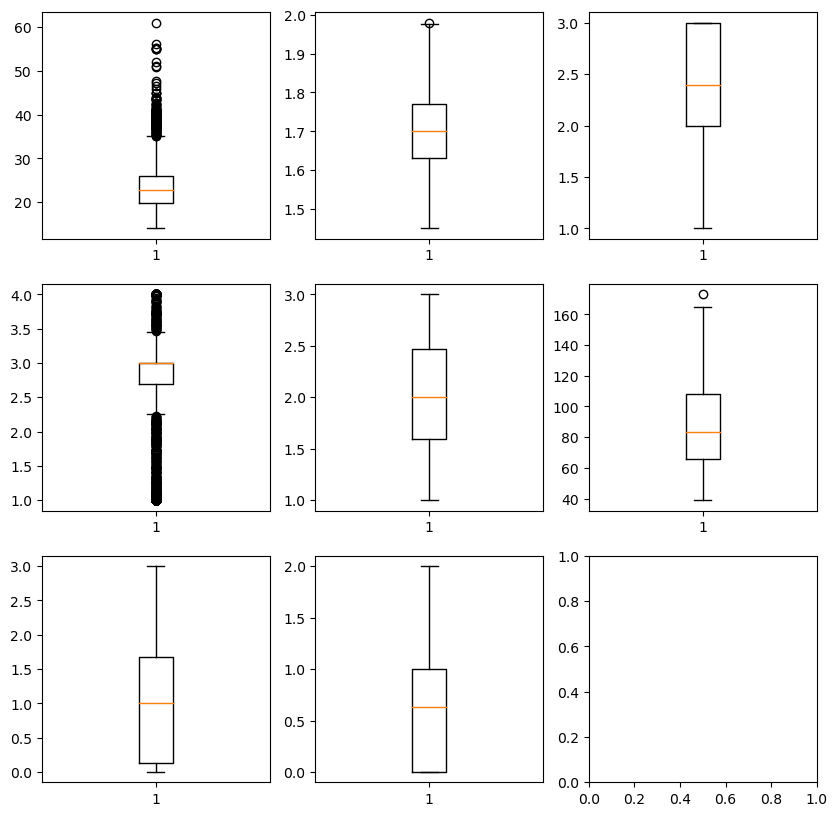

In [10]:
f,ax=plt.subplots(3,3,figsize=(10,10))
ax[0,0].boxplot(data.Age)
ax[0,1].boxplot(data.Height)
ax[0,2].boxplot(data.FCVC)
ax[1,0].boxplot(data.NCP)
ax[1,1].boxplot(data.CH2O)
ax[1,2].boxplot(data.Weight)
ax[2,0].boxplot(data.FAF)
ax[2,1].boxplot(data.TUE)
plt.show()

#### outliers in Age and NCP needs to be handled and FCVC,FAF and TUE are highly skewed they should converted into normal distribution

In [11]:
data.Age.unique()

array([21.      , 23.      , 27.      , ..., 22.524036, 24.361936,
       23.664709])

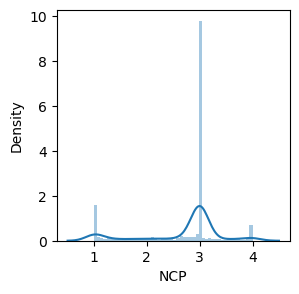

In [12]:
plt.figure(figsize=(3,3))
sns.distplot(data.NCP)
plt.show()

#### there are lot of floating values in Age and NCP that should be rounded of as these values should be integers

In [13]:
data.Age=[round(i) for i in data.Age]
data.NCP=[round(i) for i in data.NCP]

{'whiskers': [<matplotlib.lines.Line2D at 0x1d45f84cc40>,
 'caps': [<matplotlib.lines.Line2D at 0x1d45f84cee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d45f250280>],
 'medians': [<matplotlib.lines.Line2D at 0x1d45f84c760>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d45f82c970>],
 'means': []}

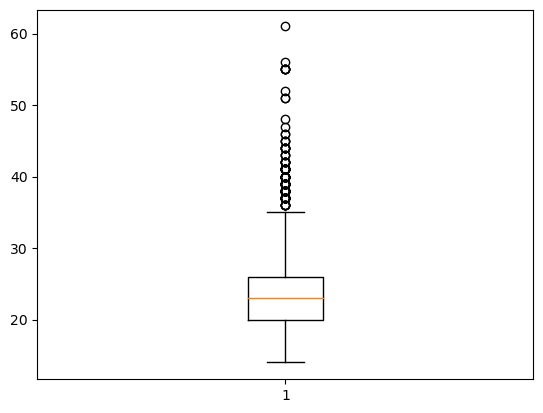

In [14]:
plt.boxplot(data.Age)

In [15]:
categorical_col=[]
for i in data:
    if type(data[i][0]) == str:
        categorical_col.append(str(i))

[]

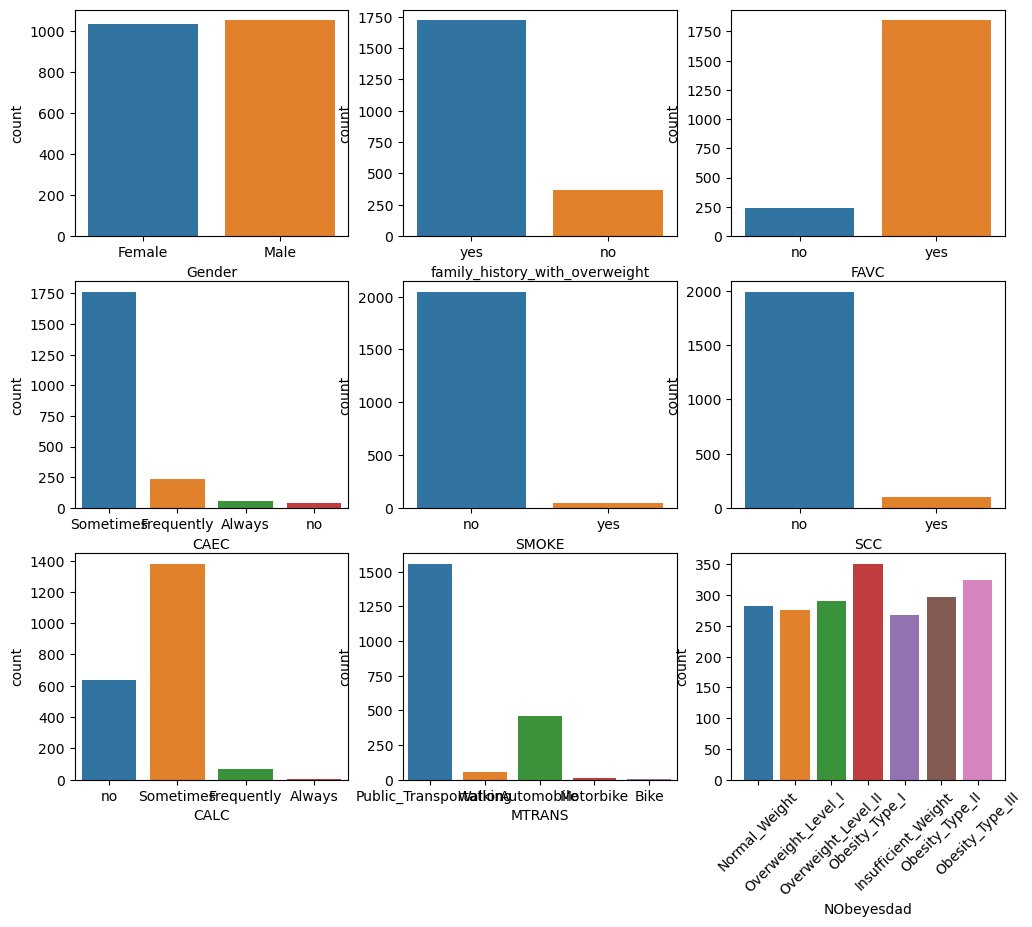

In [16]:
fig, ax = plt.subplots(3, 3, figsize=(12, 10))
for col, subplot in zip(categorical_col, ax.flatten()):
    sns.countplot(data[col], ax=subplot)
    plt.xticks(rotation=45)
plt.plot()

<pre>
Target column is approcimatly balanced
there are equal no. of male and female
people with family history of being over-weight are more
data is skewed towords people with frquent consumtion of high calory food
there are more number of non smokers
<pre>

In [17]:
for i in categorical_col:
    print(data.groupby(i).mean()['Weight'], end='\n\n')

Gender
Female    82.551078
Male      91.096771
Name: Weight, dtype: float64

family_history_with_overweight
no     58.821477
yes    92.801585
Name: Weight, dtype: float64

FAVC
no     67.047572
yes    89.469419
Name: Weight, dtype: float64

CAEC
Always        71.090566
Frequently    59.120059
Sometimes     91.436688
no            68.487214
Name: Weight, dtype: float64

SMOKE
no     86.765085
yes    91.206810
Name: Weight, dtype: float64

SCC
no     88.039772
yes    62.364398
Name: Weight, dtype: float64

CALC
Always        65.000000
Frequently    80.679024
Sometimes     91.859166
no            76.723251
Name: Weight, dtype: float64

MTRANS
Automobile               85.931539
Bike                     76.714286
Motorbike                73.090909
Public_Transportation    87.838899
Walking                  70.825128
Name: Weight, dtype: float64

NObeyesdad
Insufficient_Weight     50.013190
Normal_Weight           62.164894
Obesity_Type_I          92.870198
Obesity_Type_II        115.305311


#### Gender, family_history, FAVC, CAEC, SCC and CALC seems to have higher impact on weight

<AxesSubplot:ylabel='Density'>

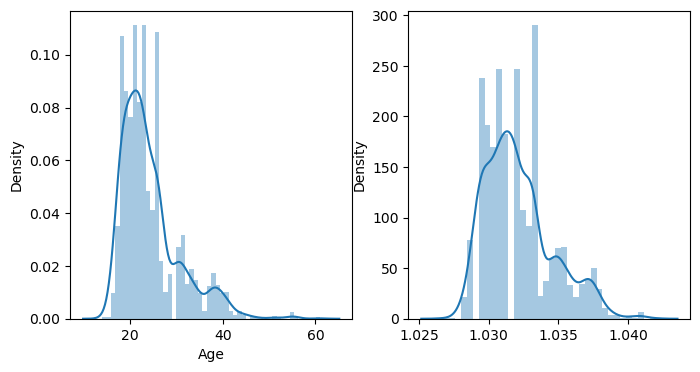

In [18]:
fig, axes=plt.subplots(1,2,figsize=(8,4))
sns.distplot(data.Age,ax=axes[0])
sns.distplot([i**0.01 for i in data.Age],ax=axes[1])

<AxesSubplot:ylabel='Density'>

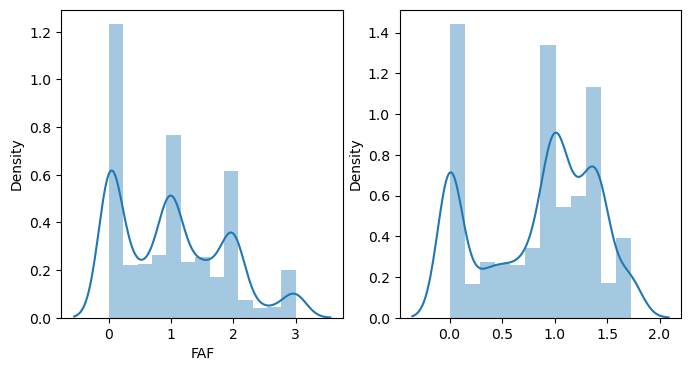

In [19]:
fig, axes=plt.subplots(1,2,figsize=(8,4))
sns.distplot(data.FAF,ax=axes[0])
sns.distplot([i**0.5 for i in data.FAF],ax=axes[1])

In [20]:
#feature selection
#training model

In [21]:
data.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

## convert the target variables as intended

In [22]:
lst=[]
dic={'Normal_Weight':'Normal','Overweight_Level_I':'Overweight', 'Overweight_Level_II':'Overweight','Obesity_Type_I':'Obesity', 'Insufficient_Weight':'Underweight', 'Obesity_Type_II':'Obesity','Obesity_Type_III':'Extreme_Obesity'}
for i in data.NObeyesdad:
    lst.append(dic[i])
data.NObeyesdad=lst

## data split in Training and Test dataset

In [23]:
data[data.CALC=='Always']

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
26,Male,21,1.7,65.0,yes,yes,2.0,1,Frequently,no,2.0,no,1.0,2.0,Always,Walking,Normal


In [24]:
data.drop([26],axis=0,inplace=True)
X=data.drop(['NObeyesdad'],axis=1)
y=data.NObeyesdad

In [25]:
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.8,random_state=42)

In [26]:
X_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
45,Female,21,1.530000,65.000000,yes,no,2.000000,3,Sometimes,no,1.000000,no,0.000000,1.000000,no,Public_Transportation
822,Female,22,1.611239,67.939653,yes,yes,1.906194,4,Sometimes,no,2.597746,no,1.922234,1.376124,Sometimes,Public_Transportation
668,Male,19,1.851123,61.264785,yes,yes,3.000000,4,Sometimes,no,2.548527,no,1.285976,0.267076,Sometimes,Automobile
171,Male,18,1.600000,58.000000,yes,yes,2.000000,3,Frequently,no,2.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
311,Male,17,1.720000,62.000000,no,yes,2.000000,3,Always,no,2.000000,no,3.000000,1.000000,no,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,Male,24,1.619810,98.543020,yes,yes,2.958410,2,Sometimes,no,1.000000,no,1.930033,0.754023,no,Public_Transportation
1120,Male,24,1.732492,84.557797,yes,yes,2.992205,3,Sometimes,no,2.413813,no,0.458237,0.688293,Sometimes,Public_Transportation
1155,Female,24,1.700499,81.108599,yes,yes,2.042762,3,Sometimes,no,1.522426,no,0.501417,1.029135,Sometimes,Public_Transportation
1319,Male,35,1.780000,102.265955,yes,yes,2.787589,1,Sometimes,no,3.000000,no,2.710338,0.572185,Sometimes,Automobile


## handling categorical variables

In [27]:
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)

In [28]:
X_test

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
887,19,1.813567,86.144904,2.643183,4,2.397124,2.044165,0.471663,0,1,...,1,0,0,1,0,0,0,0,1,0
841,20,1.800000,85.000000,2.188722,3,2.721356,1.528968,1.000000,0,1,...,1,0,0,1,0,0,0,0,1,0
390,23,1.710000,50.000000,2.000000,3,3.000000,0.000000,2.000000,0,1,...,1,0,0,0,1,0,0,0,1,0
596,17,1.798645,59.612717,2.336044,4,2.000000,2.000000,0.133005,0,1,...,1,0,0,0,1,1,0,0,0,0
1734,31,1.767140,120.344402,2.117121,3,2.193008,0.992829,1.556052,0,1,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,31,1.764166,119.373019,2.970983,3,2.828861,0.454944,1.915818,0,1,...,1,0,0,1,0,1,0,0,0,0
715,17,1.844749,59.313525,2.432886,3,2.000000,2.697949,1.000000,0,1,...,1,0,0,0,1,1,0,0,0,0
1742,28,1.805445,119.484614,2.911312,3,2.501808,0.946760,0.785701,0,1,...,1,0,0,1,0,1,0,0,0,0
1699,40,1.706741,108.012603,2.487781,4,1.000000,1.860765,0.000000,0,1,...,1,0,0,0,1,1,0,0,0,0


## Feature scaling

In [29]:
ss=StandardScaler()
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)
X_train_ss

array([[-0.5214861 , -1.85566223, -0.83680912, ..., -0.07365429,
         0.58565789, -0.16071795],
       [-0.36742325, -0.98367653, -0.72492533, ..., -0.07365429,
         0.58565789, -0.16071795],
       [-0.82961178,  1.59113876, -0.97897214, ..., -0.07365429,
        -1.70748147, -0.16071795],
       ...,
       [-0.05929757, -0.02559674, -0.22371262, ..., -0.07365429,
         0.58565789, -0.16071795],
       [ 1.6353937 ,  0.827734  ,  0.58154058, ..., -0.07365429,
        -1.70748147, -0.16071795],
       [ 1.32726802,  1.45877219,  0.03316522, ..., -0.07365429,
        -1.70748147, -0.16071795]])

In [30]:
X_train_ss=pd.DataFrame(X_train_ss,columns=X_train.columns)
X_test_ss=pd.DataFrame(X_test_ss,columns=X_test.columns)
X_train_ss

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-0.521486,-1.855662,-0.836809,-0.817867,0.372558,-1.659489,-1.183145,0.565395,0.990453,-0.990453,...,0.222973,-0.222973,-0.193167,-1.395348,1.515402,-0.533904,-0.054833,-0.073654,0.585658,-0.160718
1,-0.367423,-0.983677,-0.724925,-0.994637,1.622913,0.985944,1.075402,1.190767,0.990453,-0.990453,...,0.222973,-0.222973,-0.193167,0.716667,-0.659891,-0.533904,-0.054833,-0.073654,0.585658,-0.160718
2,-0.829612,1.591139,-0.978972,1.066563,1.622913,0.904451,0.327824,-0.653219,-1.009639,1.009639,...,0.222973,-0.222973,-0.193167,0.716667,-0.659891,1.872994,-0.054833,-0.073654,-1.707481,-0.160718
3,-0.983675,-1.104311,-1.103231,-0.817867,0.372558,-0.003761,-0.008186,-1.097280,-1.009639,1.009639,...,0.222973,-0.222973,-0.193167,0.716667,-0.659891,-0.533904,-0.054833,-0.073654,0.585658,-0.160718
4,-1.137737,0.183719,-0.950990,-0.817867,0.372558,-0.003761,2.341733,0.565395,-1.009639,1.009639,...,0.222973,-0.222973,-0.193167,-1.395348,1.515402,-0.533904,-0.054833,-0.073654,0.585658,-0.160718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,-0.059298,-0.891679,0.439845,0.988189,-0.877798,-1.659489,1.084565,0.156415,-1.009639,1.009639,...,0.222973,-0.222973,-0.193167,-1.395348,1.515402,-0.533904,-0.054833,-0.073654,0.585658,-0.160718
1664,-0.059298,0.317803,-0.092435,1.051873,0.372558,0.681401,-0.644735,0.047127,-1.009639,1.009639,...,0.222973,-0.222973,-0.193167,0.716667,-0.659891,-0.533904,-0.054833,-0.073654,0.585658,-0.160718
1665,-0.059298,-0.025597,-0.223713,-0.737285,0.372558,-0.794494,-0.594000,0.613837,0.990453,-0.990453,...,0.222973,-0.222973,-0.193167,0.716667,-0.659891,-0.533904,-0.054833,-0.073654,0.585658,-0.160718
1666,1.635394,0.827734,0.581541,0.666289,-2.128153,1.651968,2.001392,-0.145922,-1.009639,1.009639,...,0.222973,-0.222973,-0.193167,0.716667,-0.659891,1.872994,-0.054833,-0.073654,-1.707481,-0.160718


<AxesSubplot:xlabel='Height', ylabel='Weight'>

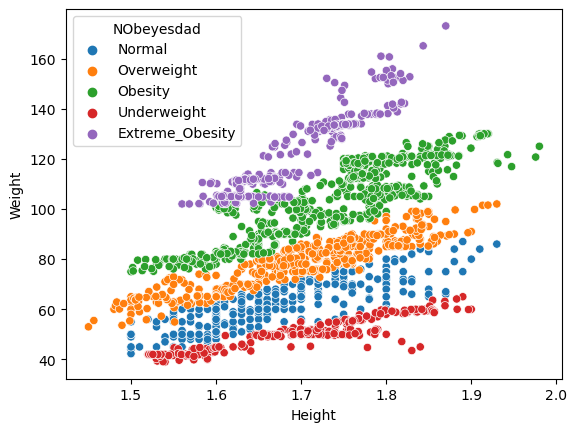

In [31]:
sns.scatterplot(data.Height,data.Weight,hue=data.NObeyesdad)

In [32]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Weight                                1.060904
FCVC                                  0.364014
Height                                0.293671
Age                                   0.293597
TUE                                   0.280286
CH2O                                  0.265519
FAF                                   0.250606
family_history_with_overweight_yes    0.152185
family_history_with_overweight_no     0.146629
Gender_Female                         0.143414
Gender_Male                           0.143114
CAEC_Sometimes                        0.142382
NCP                                   0.125494
CAEC_Frequently                       0.103870
FAVC_no                               0.085864
MTRANS_Public_Transportation          0.077823
CALC_Sometimes                        0.058477
CALC_no                               0.055895
SCC_no                                0.054791
FAVC_yes                              0.048975
MTRANS_Automobile                     0.045728
CALC_Frequent

<AxesSubplot:>

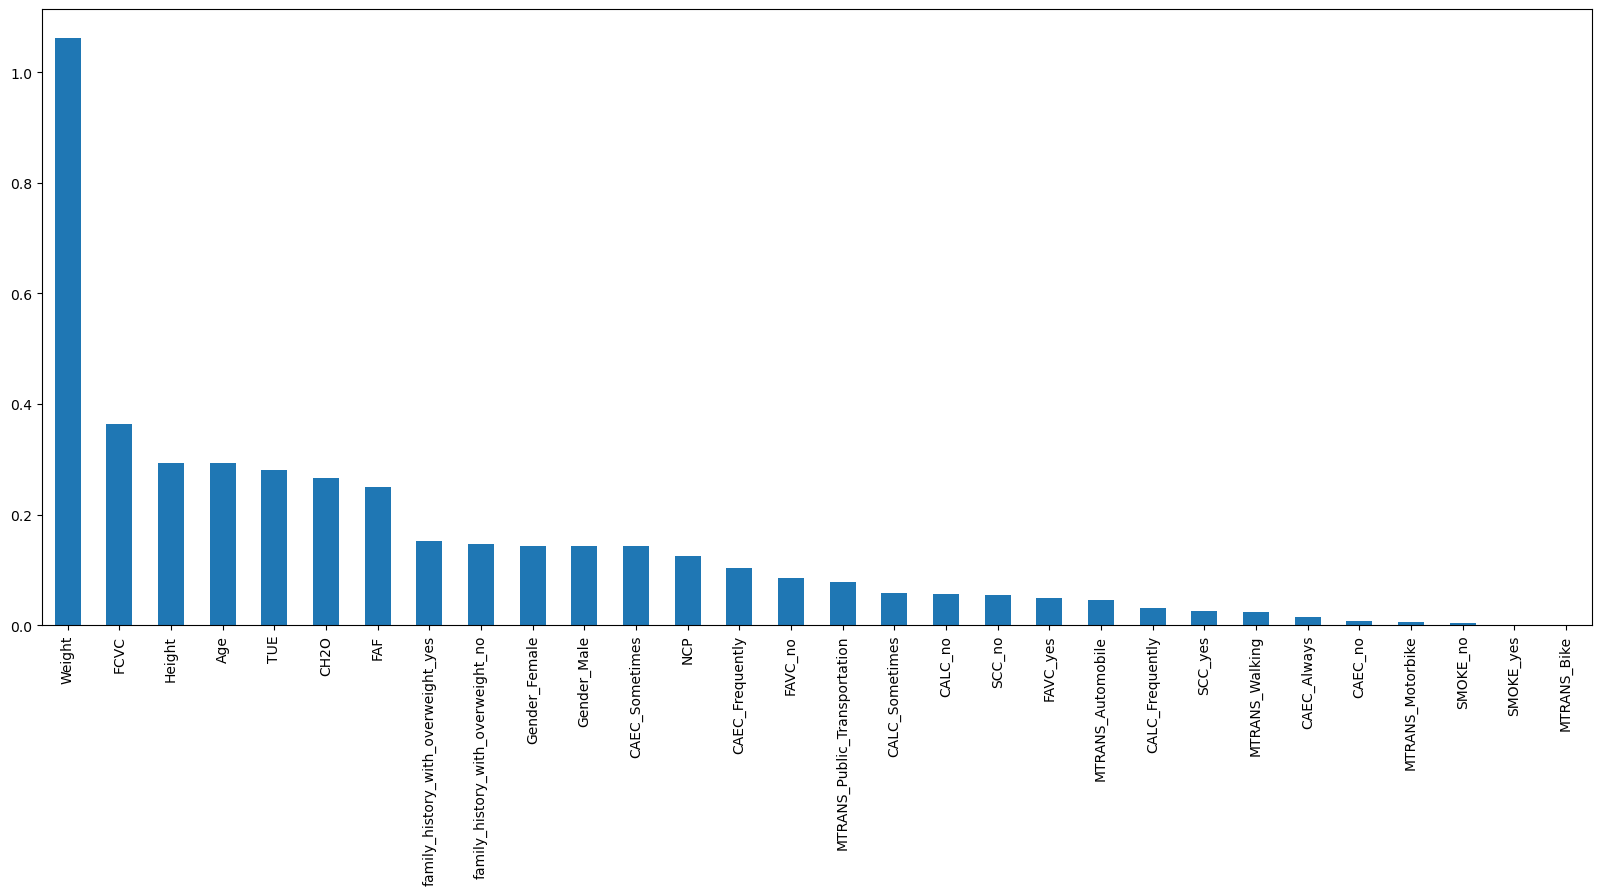

In [33]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [35]:
model=LogisticRegression()
model.fit(X_train_ss,y_train)
y_predicted=model.predict(X_test_ss)

In [36]:
cm=confusion_matrix(y_test,y_predicted)
cm

print("Accuracy Score- ",accuracy_score(y_test,y_predicted))

Accuracy Score-  0.9354066985645934


Classification Report                   precision    recall  f1-score   support

Extreme_Obesity       0.96      0.98      0.97        56
         Normal       0.87      0.77      0.82        61
        Obesity       0.98      0.98      0.98       141
     Overweight       0.93      0.93      0.93       106
    Underweight       0.88      0.96      0.92        54

       accuracy                           0.94       418
      macro avg       0.92      0.93      0.92       418
   weighted avg       0.93      0.94      0.93       418



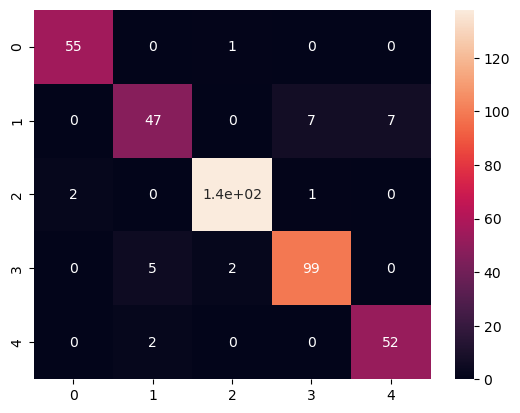

In [37]:
sns.heatmap(cm,annot=True)

print("Classification Report ",classification_report(y_test,y_predicted))

In [41]:

def evaluate_model(X_train_ss,y_train,X_test_ss,y_test,models):
    for i in models.keys():       
        model=models[i]
        model.fit(X_train_ss,y_train)
        y_predicted=model.predict(X_test_ss)
        print(f"Classification Report for {i} is \n ",classification_report(y_test,y_predicted))

In [44]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
#     "XGBClassifier": XGBClassifier(), 
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [45]:
evaluate_model(X_train_ss,y_train,X_test_ss,y_test,models)

Classification Report for Random Forest is 
                   precision    recall  f1-score   support

Extreme_Obesity       1.00      1.00      1.00        56
         Normal       0.86      0.98      0.92        61
        Obesity       1.00      0.98      0.99       141
     Overweight       0.98      0.96      0.97       106
    Underweight       1.00      0.93      0.96        54

       accuracy                           0.97       418
      macro avg       0.97      0.97      0.97       418
   weighted avg       0.97      0.97      0.97       418

Classification Report for Decision Tree is 
                   precision    recall  f1-score   support

Extreme_Obesity       1.00      1.00      1.00        56
         Normal       0.91      0.87      0.89        61
        Obesity       0.99      0.96      0.97       141
     Overweight       0.92      0.94      0.93       106
    Underweight       0.91      0.98      0.95        54

       accuracy                           0.95  

#### here Gradient Boost shows highest wrighted f1_socre so, Gradient Boost should be considered as final model algorithm

In [46]:
from sklearn.metrics import log_loss
log_loss(y_test,y_predicted)

ValueError: could not convert string to float: 'Overweight'

In [47]:
print("Classification Report ",classification_report(y_test,y_predicted))

Classification Report                   precision    recall  f1-score   support

Extreme_Obesity       0.96      0.98      0.97        56
         Normal       0.87      0.77      0.82        61
        Obesity       0.98      0.98      0.98       141
     Overweight       0.93      0.93      0.93       106
    Underweight       0.88      0.96      0.92        54

       accuracy                           0.94       418
      macro avg       0.92      0.93      0.92       418
   weighted avg       0.93      0.94      0.93       418

